# Participants

In [71]:
import pandas as pd

p = pd.read_csv('/Users/sarahting/desktop/TDI Project/UCLA Consortium/participants.tsv', sep='\t')

#Schizo Patients Data
schiz_patients = p[(p['diagnosis']=='SCHZ') & (p['bart']==1.0) & (p['scap']==1.0) & (p['stopsignal']==1.0) & (p['taskswitch']==1.0) & p['bht']==1.0]
list_of_schizpatient_id = list(schiz_patients['participant_id'])
list_of_schizpatient_id

#Bipolar Patients Data
bip_patients = p[(p['diagnosis']=='BIPOLAR') & (p['bart']==1.0) & (p['scap']==1.0) & (p['stopsignal']==1.0) & (p['taskswitch']==1.0) & p['bht']==1.0]
list_of_bippatient_id = list(bip_patients['participant_id'])
len(list_of_bippatient_id)


#list_of_schizpatient_id

47

# Stop Signal Task

Measurements that I can get from this:
1. proportion of successful stops (inhibition)
2. direction error (pressing left when the arrow is point right)
3. median correct reaction time on Go trials
4. stop signal reaction time (SSSRT)
5. stop signal delay?? Seems to be set by the experimenter

Lappin and Eriksen (1966) used a visual stop-signal task and found that
participant slowed their RT to the go stimulus in order to keep response rate
constant across the stop-signal delays. 

# Initial Exploration

## Exploring proportion of succesful stops

### Control Sample

In [8]:
sst = pd.read_csv('/Users/sarahting/desktop/sub-10171_func_sub-10171_task-stopsignal_events.tsv',sep='\t')
sst.head()

,onset,duration,trial_type,PresentedStimulusArrowDirection,ReactionTime,SubjectResponseButton,SubjectResponseButtonCode,SubjectResponseCorrectness,TrialOutcome,StopSignalDelay,LadderNumber,LadderTime,LadderMovement,TimeCourse,onset_noTriggerAdjust,TimeCourse_noTriggerAdjust
0,2.008960,1.500,GO,LEFT,0.510127,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,2.000,0.008960,0.000
1,2.000000,2.875,NaN,BLANKSCREEN,0.000000,NaN,0,NaN,NaN,0.0,0,0,0,3.500,0.000000,1.500
2,6.377515,1.500,GO,LEFT,0.529451,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,6.375,4.377515,4.375
3,2.000000,2.000,NaN,BLANKSCREEN,0.000000,NaN,0,NaN,NaN,0.0,0,0,0,7.875,0.000000,5.875
4,9.885531,1.500,GO,RIGHT,0.333150,RIGHT,28,CorrectResponse,SuccessfulGo,0.0,0,0,0,9.875,7.885531,7.875


In [16]:
import numpy as np
sst = sst[np.invert(sst['SubjectResponseCorrectness'].isnull())] #get all the data without blankscreen responses
sst.head()

,onset,duration,trial_type,PresentedStimulusArrowDirection,ReactionTime,SubjectResponseButton,SubjectResponseButtonCode,SubjectResponseCorrectness,TrialOutcome,StopSignalDelay,LadderNumber,LadderTime,LadderMovement,TimeCourse,onset_noTriggerAdjust,TimeCourse_noTriggerAdjust
0,2.008960,1.5,GO,LEFT,0.510127,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,2.000,0.008960,0.000
2,6.377515,1.5,GO,LEFT,0.529451,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,6.375,4.377515,4.375
4,9.885531,1.5,GO,RIGHT,0.333150,RIGHT,28,CorrectResponse,SuccessfulGo,0.0,0,0,0,9.875,7.885531,7.875
6,12.384053,1.5,GO,RIGHT,0.355458,RIGHT,28,CorrectResponse,SuccessfulGo,0.0,0,0,0,12.375,10.384053,10.375
8,14.502021,1.5,GO,LEFT,0.331121,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,14.500,12.502021,12.500


In [10]:
stop_trials = sst[sst['trial_type']=='STOP']
total_stop = len(stop_trials)
unsuccessful_stop = len(stop_trials[stop_trials['TrialOutcome']=='UnsuccessfulStop'])
score = unsuccessful_stop / total_stop
score

0.40625

### Schizo Sample

In [38]:
sst_schiz = pd.read_csv('/Users/sarahting/desktop/sub-50006_func_sub-50006_task-stopsignal_events.tsv',sep='\t')
sst_schiz = sst_schiz[np.invert(sst_schiz['SubjectResponseCorrectness'].isnull())] #get all the data without blankscreen responses

stop_trials = sst_schiz[sst_schiz['trial_type']=='STOP']
total_stop = len(stop_trials)
unsuccessful_stop = len(stop_trials[stop_trials['TrialOutcome']=='UnsuccessfulStop'])
score = unsuccessful_stop / total_stop
score

0.5625

### Bipolar Sample

In [39]:
sst_bip = pd.read_csv('/Users/sarahting/desktop/sub-60079_func_sub-60079_task-stopsignal_events.tsv',sep='\t')
sst_bip = sst_bip[np.invert(sst_bip['SubjectResponseCorrectness'].isnull())] #get all the data without blankscreen responses

stop_trials = sst_bip[sst_bip['trial_type']=='STOP']
total_bip = len(stop_trials)
unsuccessful_stop = len(stop_trials[stop_trials['TrialOutcome']=='UnsuccessfulStop'])
score = unsuccessful_stop / total_stop
score

0.53125

### Function for proportion of successful stops

In [36]:
def pss(sst):
    stop_trials = sst[sst['trial_type']=='STOP']
    total_stop = len(stop_trials)
    unsuccessful_stop = len(stop_trials[stop_trials['TrialOutcome']=='UnsuccessfulStop'])
    score = unsuccessful_stop / total_stop
    return score

# Exploring direction error

### Controls Sample

In [17]:
sst.head()

,onset,duration,trial_type,PresentedStimulusArrowDirection,ReactionTime,SubjectResponseButton,SubjectResponseButtonCode,SubjectResponseCorrectness,TrialOutcome,StopSignalDelay,LadderNumber,LadderTime,LadderMovement,TimeCourse,onset_noTriggerAdjust,TimeCourse_noTriggerAdjust
0,2.008960,1.5,GO,LEFT,0.510127,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,2.000,0.008960,0.000
2,6.377515,1.5,GO,LEFT,0.529451,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,6.375,4.377515,4.375
4,9.885531,1.5,GO,RIGHT,0.333150,RIGHT,28,CorrectResponse,SuccessfulGo,0.0,0,0,0,9.875,7.885531,7.875
6,12.384053,1.5,GO,RIGHT,0.355458,RIGHT,28,CorrectResponse,SuccessfulGo,0.0,0,0,0,12.375,10.384053,10.375
8,14.502021,1.5,GO,LEFT,0.331121,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,14.500,12.502021,12.500


In [33]:
sst_dir = sst[np.invert(sst['SubjectResponseButton'].isnull())]
incor_dir = sst_dir[sst_dir['SubjectResponseCorrectness']=='IncorrectResponse']
dir_score = (len(sst_dir)-len(incor_dir))/len(sst_dir)
dir_score

0.981651376146789

### Schizo Sample

In [31]:
sst_schiz.head()
sst_dir_schiz = sst_schiz[np.invert(sst_schiz['SubjectResponseButton'].isnull())]
incor_dir_schiz = sst_dir_schiz[sst_dir_schiz['SubjectResponseCorrectness']=='IncorrectResponse']
dir_schiz_score = (len(sst_dir_schiz)-len(incor_dir_schiz))/len(sst_dir_schiz)
dir_schiz_score

1.0

### Bipolar Sample

In [30]:
sst_dir_bip = sst_bip[np.invert(sst_bip['SubjectResponseButton'].isnull())]
incor_dir_bip = sst_dir_bip[sst_dir_bip['SubjectResponseCorrectness']=='IncorrectResponse']
dir_bip_score = (len(sst_dir_bip)-len(incor_dir_bip))/len(sst_dir_bip)
dir_bip_score

0.9646017699115044

### Function for Direction Score

In [35]:
def dir_score(sst):
    sst_dir = sst[np.invert(sst['SubjectResponseButton'].isnull())]
    incor_dir = sst_dir[sst_dir['SubjectResponseCorrectness']=='IncorrectResponse']
    dir_score = (len(sst_dir)-len(incor_dir))/len(sst_dir)
    return dir_score

## Exploring median correct reaction time on Go trials

### Bipolar Sample

In [40]:
sst_bip.head()

,onset,duration,trial_type,PresentedStimulusArrowDirection,ReactionTime,SubjectResponseButton,SubjectResponseButtonCode,SubjectResponseCorrectness,TrialOutcome,StopSignalDelay,LadderNumber,LadderTime,LadderMovement,TimeCourse,onset_noTriggerAdjust,TimeCourse_noTriggerAdjust
0,0.018732,1.5,STOP,LEFT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.250387,2,250,1,0.000,0.018732,0.000
2,2.389508,1.5,STOP,RIGHT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.352329,1,350,1,2.375,2.389508,2.375
4,7.512327,1.5,GO,RIGHT,0.600701,RIGHT,28,CorrectResponse,SuccessfulGo,0.000000,0,0,0,7.500,7.512327,7.500
6,9.883343,1.5,GO,RIGHT,0.385939,RIGHT,28,CorrectResponse,SuccessfulGo,0.000000,0,0,0,9.875,9.883343,9.875
8,12.138003,1.5,GO,LEFT,0.346271,LEFT,5,CorrectResponse,SuccessfulGo,0.000000,0,0,0,12.125,12.138003,12.125


In [46]:
#filter for GO trials
#filter out incorrect responses
#grab reaction time
bip_GO = sst_bip[(sst_bip['trial_type']=='GO') & (sst_bip['SubjectResponseCorrectness']=='CorrectResponse')]
bip_GO['ReactionTime'].mean()

0.4186617837204594

### Schizo Sample 

In [49]:
schiz_GO = sst_schiz[(sst_bip['trial_type']=='GO') & (sst_bip['SubjectResponseCorrectness']=='CorrectResponse')]
schiz_GO['ReactionTime'].mean()

0.5806983862150608

### Control Sample

In [50]:
control_GO = sst[(sst_bip['trial_type']=='GO') & (sst_bip['SubjectResponseCorrectness']=='CorrectResponse')]
control_GO['ReactionTime'].mean()

0.3946567205591569

### Function for mean reaction time on correct Go trials

In [51]:
def grt(sst):
    GO = sst[(sst_bip['trial_type']=='GO') & (sst_bip['SubjectResponseCorrectness']=='CorrectResponse')]
    return GO['ReactionTime'].mean()

## Exploring stop signal reaction time (SSRT) paused bc it requires integration of probabilities

In [52]:
sst_bip.head()

,onset,duration,trial_type,PresentedStimulusArrowDirection,ReactionTime,SubjectResponseButton,SubjectResponseButtonCode,SubjectResponseCorrectness,TrialOutcome,StopSignalDelay,LadderNumber,LadderTime,LadderMovement,TimeCourse,onset_noTriggerAdjust,TimeCourse_noTriggerAdjust
0,0.018732,1.5,STOP,LEFT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.250387,2,250,1,0.000,0.018732,0.000
2,2.389508,1.5,STOP,RIGHT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.352329,1,350,1,2.375,2.389508,2.375
4,7.512327,1.5,GO,RIGHT,0.600701,RIGHT,28,CorrectResponse,SuccessfulGo,0.000000,0,0,0,7.500,7.512327,7.500
6,9.883343,1.5,GO,RIGHT,0.385939,RIGHT,28,CorrectResponse,SuccessfulGo,0.000000,0,0,0,9.875,9.883343,9.875
8,12.138003,1.5,GO,LEFT,0.346271,LEFT,5,CorrectResponse,SuccessfulGo,0.000000,0,0,0,12.125,12.138003,12.125


In [55]:
#filter for STOP in trial type
#filter for reaction time
sst_bip[sst_bip['trial_type']=='STOP'].head(10)

,onset,duration,trial_type,PresentedStimulusArrowDirection,ReactionTime,SubjectResponseButton,SubjectResponseButtonCode,SubjectResponseCorrectness,TrialOutcome,StopSignalDelay,LadderNumber,LadderTime,LadderMovement,TimeCourse,onset_noTriggerAdjust,TimeCourse_noTriggerAdjust
0,0.018732,1.5,STOP,LEFT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.250387,2,250,1,0.000,0.018732,0.000
2,2.389508,1.5,STOP,RIGHT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.352329,1,350,1,2.375,2.389508,2.375
28,38.896888,1.5,STOP,LEFT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.301683,2,300,1,38.875,38.896888,38.875
30,41.765189,1.5,STOP,RIGHT,0.342857,RIGHT,28,CorrectResponse,UnsuccessfulStop,0.000000,1,400,-1,41.750,41.765189,41.750
44,60.383466,1.5,STOP,LEFT,0.393304,LEFT,5,CorrectResponse,UnsuccessfulStop,0.350625,2,350,-1,60.375,60.383466,60.375
46,62.770935,1.5,STOP,RIGHT,0.299356,RIGHT,28,CorrectResponse,UnsuccessfulStop,0.000000,1,350,-1,62.750,62.770935,62.750
48,64.760353,1.5,STOP,LEFT,0.279585,LEFT,5,CorrectResponse,UnsuccessfulStop,0.000000,1,300,-1,64.750,64.760353,64.750
54,72.519565,1.5,STOP,RIGHT,0.296061,RIGHT,28,CorrectResponse,UnsuccessfulStop,0.000000,2,300,-1,72.500,72.519565,72.500
66,90.143102,1.5,STOP,RIGHT,0.000000,NaN,0,IncorrectResponse,SuccessfulStop,0.252211,1,250,1,90.125,90.143102,90.125
78,103.638624,1.5,STOP,LEFT,0.354920,LEFT,5,CorrectResponse,UnsuccessfulStop,0.251761,2,250,-1,103.625,103.638624,103.625


## Exploring successful stop delays

In [60]:
# Successful Stops Delay Biploar
success_stop_bip = sst_bip[sst_bip['TrialOutcome']=='SuccessfulStop']
success_stop_bip['StopSignalDelay'].mean()

0.24771621353344636

In [61]:
# Successful Stops Delay Schizo
success_stop_schiz = sst_schiz[sst_schiz['TrialOutcome']=='SuccessfulStop']
success_stop_schiz['StopSignalDelay'].mean()

0.5092257643571463

In [64]:
# Successful Stops Delay Control
success_stop = sst[sst['TrialOutcome']=='SuccessfulStop']
success_stop['StopSignalDelay'].mean()

0.213159245789436

### Function for stop delay

In [63]:
def succ_stop_delay(sst):
    bart = pd.read_csv(filepath,sep='\t')
    success_stop = sst[sst['TrialOutcome']=='SuccessfulStop']
    return success_stop['StopSignalDelay'].mean()

# Exploring All Participants' Stop Signal Task Data

## Proportion of Successful Stops

### Schizo Patients

In [92]:
def pss_score(filepath):
    sst = pd.read_csv(filepath,sep='\t')
    sst = sst[np.invert(sst['SubjectResponseCorrectness'].isnull())] 
    stop_trials = sst[sst['trial_type']=='STOP']
    total_stop = len(stop_trials)
    unsuccessful_stop = len(stop_trials[stop_trials['TrialOutcome']=='UnsuccessfulStop'])
    score = unsuccessful_stop / total_stop
    return round(score,2)

In [95]:
import os
path = '/Users/sarahting/desktop/stop signal/Schiz/'
filenames = [path + filename for filename in os.listdir(path)]

pss_schiz_scores = []
for filepath in filenames:
    if filepath.endswith('.tsv'):
        pss_schiz_scores.append(pss_score(filepath))

#pss_schiz_scores

### Bipolar Patients

In [98]:
def pss_score(filepath):
    sst = pd.read_csv(filepath,sep='\t')
    sst = sst[np.invert(sst['SubjectResponseCorrectness'].isnull())] 
    stop_trials = sst[sst['trial_type']=='STOP']
    total_stop = len(stop_trials)
    unsuccessful_stop = len(stop_trials[stop_trials['TrialOutcome']=='UnsuccessfulStop'])
    score = unsuccessful_stop / total_stop
    return round(score,2)

In [100]:
import os
path = '/Users/sarahting/desktop/stop signal/Bipolar/'
filenames = [path + filename for filename in os.listdir(path)]

pss_bip_scores = []
for filepath in filenames:
    if filepath.endswith('.tsv'):
        pss_bip_scores.append(pss_score(filepath))

#pss_bip_scores

### Dataframe for both groups of patients

In [107]:
pss_df = pd.DataFrame(data=[pss_bip_scores,pss_schiz_scores])
pss_df = pss_df.T
pss_df.columns = ['Bipolar','Schiz']
pss_df.mean()

Bipolar    0.517234
Schiz      0.543061
dtype: float64

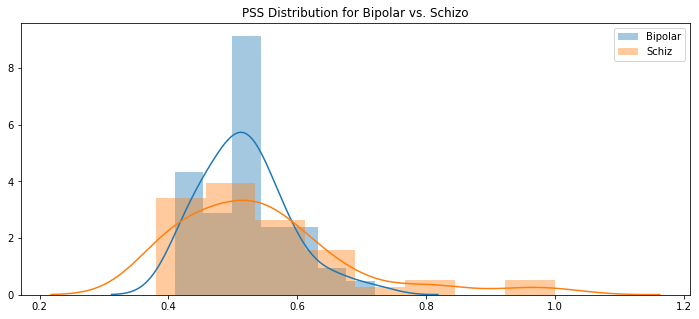

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(12,5))
sns.distplot(pss_df['Bipolar'][:47], label='Bipolar')
sns.distplot(pss_df['Schiz'],label='Schiz')
plt.title('PSS Distribution for Bipolar vs. Schizo')
plt.legend()
plt.xlabel(None);

## Direction Error

### Bipolar

In [117]:
def dir_score(filepath):
    sst = pd.read_csv(filepath,sep='\t')
    sst_dir = sst[np.invert(sst['SubjectResponseButton'].isnull())]
    incor_dir = sst_dir[sst_dir['SubjectResponseCorrectness']=='IncorrectResponse']
    dir_score = (len(sst_dir)-len(incor_dir))/len(sst_dir)
    return round(dir_score,2)

In [121]:
import os
path = '/Users/sarahting/desktop/stop signal/Bipolar/'
filenames = [path + filename for filename in os.listdir(path)]

dir_bip_scores = []
for filepath in filenames:
    if filepath.endswith('.tsv'):
        dir_bip_scores.append(dir_score(filepath))

#dir_bip_scores

### Schizo

In [ ]:
def dir_score(filepath):
    sst = pd.read_csv(filepath,sep='\t')
    sst_dir = sst[np.invert(sst['SubjectResponseButton'].isnull())]
    incor_dir = sst_dir[sst_dir['SubjectResponseCorrectness']=='IncorrectResponse']
    dir_score = (len(sst_dir)-len(incor_dir))/len(sst_dir)
    return round(dir_score,2)

In [123]:
import os
path = '/Users/sarahting/desktop/stop signal/Schiz/'
filenames = [path + filename for filename in os.listdir(path)]

dir_schiz_scores = []
for filepath in filenames:
    if filepath.endswith('.tsv'):
        dir_schiz_scores.append(dir_score(filepath))

#dir_schiz_scores

### Dataframe 

In [131]:
dir_df = pd.DataFrame(data=[dir_bip_scores,dir_schiz_scores])
dir_df = dir_df.T
dir_df.columns = ['Bipolar','Schiz']
dir_df.mean()

Bipolar    0.980426
Schiz      0.967551
dtype: float64

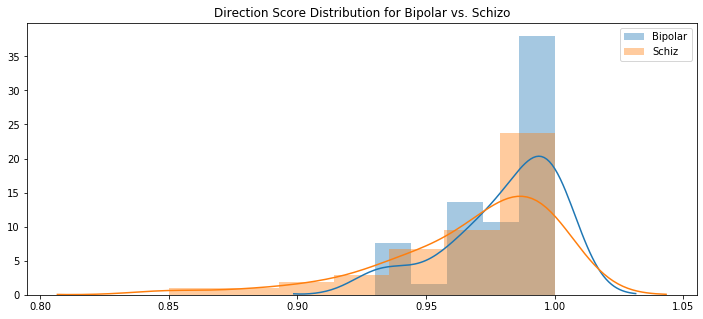

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(12,5))
sns.distplot(dir_df['Bipolar'][:47], label='Bipolar')
sns.distplot(dir_df['Schiz'],label='Schiz')
plt.title('Direction Score Distribution for Bipolar vs. Schizo')
plt.legend()
plt.xlabel(None);

## Mean Correct Reaction Time on Go Trials

### Bipolar 

In [152]:
def grt(filepath):
    sst = pd.read_csv(filepath,sep='\t')
    sst = sst[np.invert(sst['SubjectResponseCorrectness'].isnull())] 
    GO = sst[(sst_bip['trial_type']=='GO') & (sst_bip['SubjectResponseCorrectness']=='CorrectResponse')]
    return round(GO['ReactionTime'].mean(),2)

In [156]:
import os
path = '/Users/sarahting/desktop/stop signal/Bipolar/'
filenames = [path + filename for filename in os.listdir(path)]

grt_bip = []
for filepath in filenames:
    if filepath.endswith('.tsv'):
        grt_bip.append(grt(filepath))

#grt_bip

### Schizo

In [146]:
def grt(filepath):
    sst = pd.read_csv(filepath,sep='\t')
    sst = sst[np.invert(sst['SubjectResponseCorrectness'].isnull())] 
    GO = sst[(sst_bip['trial_type']=='GO') & (sst_bip['SubjectResponseCorrectness']=='CorrectResponse')]
    return round(GO['ReactionTime'].mean(),2)

In [148]:
import os
path = '/Users/sarahting/desktop/stop signal/Schiz/'
filenames = [path + filename for filename in os.listdir(path)]

grt_schiz = []
for filepath in filenames:
    if filepath.endswith('.tsv'):
        grt_schiz.append(grt(filepath))

#grt_schiz

### Dataframe and Graph 

In [154]:
grt_df = pd.DataFrame(data=[grt_bip,grt_schiz])
grt_df = grt_df.T
grt_df.columns = ['Bipolar','Schiz']
grt_df.mean()

Bipolar    0.453191
Schiz      0.486939
dtype: float64

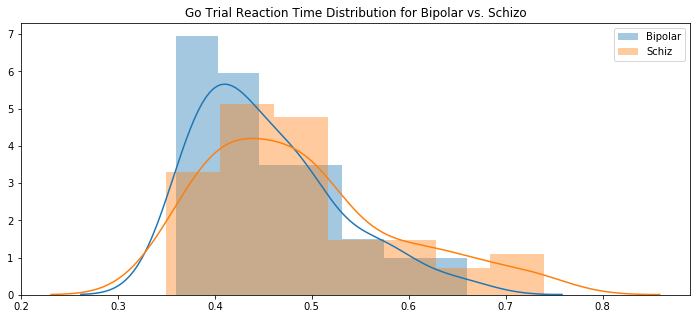

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(12,5))
sns.distplot(grt_df['Bipolar'][:47], label='Bipolar')
sns.distplot(grt_df['Schiz'],label='Schiz')
plt.title('Go Trial Reaction Time Distribution for Bipolar vs. Schizo')
plt.legend()
plt.xlabel(None);